---
# Formule de Benamou-Brenier
---



## Discrétisation du gradient et de la divergence

On utilise les différences finies : en $x$, on pose $dx := x_{i+1} - x_i$ supposé constant pour tout $i$,

$$ \partial_x f(x_i, y_i) \approx \frac{f(x_{i+1}, y_i)-f(x_i, y_i)}{dx}, $$

$$ \partial_x f(x_i, y_i) \approx \frac{f(x_i, y_i)-f(x_{i-1}, y_i)}{dx}, $$

$$ \partial_x f(x_i, y_i) \approx \frac{f(x_{i+1}, y_i)-f(x_{i-1}, y_i)}{2dx}. $$

Idem en $y$ avec $dy$ ou en $t$ avec $dt$.


In [1]:
dt = 1#./Nt
dx = 1#./Nx
dy = 1#./Ny

In [2]:
def spaceTimeDiv(u):
  gradTU = np.zeros(Nt*Nx*Ny)
  for n in range(Nt):
    for y in range(Ny):
      for x in range(Nx):
        if n > 0 and n < Nt-1:
          gradTU[n*Nx*Ny+y*Nx+x] = 0.5*(u[0, (n+1)*Nx*Ny+y*Nx+x] - u[0, (n-1)*Nx*Ny+y*Nx+x])
        elif n == 0:
          gradTU[n*Nx*Ny+y*Nx+x] = u[0, (n+1)*Nx*Ny+y*Nx+x] - u[0, (n)*Nx*Ny+y*Nx+x]
        elif n == Nt-1:
          gradTU[n*Nx*Ny+y*Nx+x] = u[0, (n)*Nx*Ny+y*Nx+x] - u[0, (n-1)*Nx*Ny+y*Nx+x]

  gradXU = np.zeros(Nt*Nx*Ny)
  for n in range(Nt):
    for y in range(Ny):
      for x in range(Nx):
        if x > 0 and x < Nx-1:
          gradXU[n*Nx*Ny+y*Nx+x] = 0.5*(u[1, n*Nx*Ny+y*Nx+x+1] - u[1, n*Nx*Ny+y*Nx+x-1])
        elif x == 0:
          gradXU[n*Nx*Ny+y*Nx+x] = u[1, n*Nx*Ny+y*Nx+x+1] - u[1, n*Nx*Ny+y*Nx+x]
        elif x == Nx-1:
          gradXU[n*Nx*Ny+y*Nx+x] = u[1, n*Nx*Ny+y*Nx+x] - u[1, n*Nx*Ny+y*Nx+x-1]

  gradYU = np.zeros(Nt*Nx*Ny)
  for n in range(Nt):
    for y in range(Ny):
      for x in range(Nx):
        if y > 0 and y < Ny-1:
          gradYU[n*Nx*Ny+y*Nx+x] = 0.5*(u[2, n*Nx*Ny+(y+1)*Nx+x] - u[2, n*Nx*Ny+(y-1)*Nx+x])
        elif y == 0:
          gradYU[n*Nx*Ny+y*Nx+x] = u[2, n*Nx*Ny+(y+1)*Nx+x] - u[2, n*Nx*Ny+y*Nx+x]
        elif y == Ny-1:
          gradYU[n*Nx*Ny+y*Nx+x] = u[2, n*Nx*Ny+y*Nx+x] - u[2, n*Nx*Ny+(y-1)*Nx+x]

  return 1./dt*gradTU + 1./dx*gradXU + 1./dy*gradYU

In [3]:
def spaceTimeGrad(u):
  gradTU = np.zeros(Nt*Nx*Ny)
  for n in range(Nt):
    for y in range(Ny):
      for x in range(Nx):
        if n > 0 and n < Nt-1:
          gradTU[n*Nx*Ny+y*Nx+x] = 0.5*(u[(n+1)*Nx*Ny+y*Nx+x] - u[(n-1)*Nx*Ny+y*Nx+x])
        elif n == 0:
          gradTU[n*Nx*Ny+y*Nx+x] = u[(n+1)*Nx*Ny+y*Nx+x] - u[(n)*Nx*Ny+y*Nx+x]
        elif n == Nt-1:
          gradTU[n*Nx*Ny+y*Nx+x] = u[(n)*Nx*Ny+y*Nx+x] - u[(n-1)*Nx*Ny+y*Nx+x]

  gradXU = np.zeros(Nt*Nx*Ny)
  for n in range(Nt):
    for y in range(Ny):
      for x in range(Nx):
        if x > 0 and x < Nx-1:
          gradXU[n*Nx*Ny+y*Nx+x] = 0.5*(u[n*Nx*Ny+y*Nx+x+1] - u[n*Nx*Ny+y*Nx+x-1])
        elif x == 0:
          gradXU[n*Nx*Ny+y*Nx+x] = u[n*Nx*Ny+y*Nx+x+1] - u[n*Nx*Ny+y*Nx+x]
        elif x == Nx-1:
          gradXU[n*Nx*Ny+y*Nx+x] = u[n*Nx*Ny+y*Nx+x] - u[n*Nx*Ny+y*Nx+x-1]

  gradYU = np.zeros(Nt*Nx*Ny)
  for n in range(Nt):
    for y in range(Ny):
      for x in range(Nx):
        if y > 0 and y < Ny-1:
          gradYU[n*Nx*Ny+y*Nx+x] = 0.5*(u[n*Nx*Ny+(y+1)*Nx+x] - u[n*Nx*Ny+(y-1)*Nx+x])
        elif y == 0:
          gradYU[n*Nx*Ny+y*Nx+x] = u[n*Nx*Ny+(y+1)*Nx+x] - u[n*Nx*Ny+y*Nx+x]
        elif y == Ny-1:
          gradYU[n*Nx*Ny+y*Nx+x] = u[n*Nx*Ny+y*Nx+x] - u[n*Nx*Ny+(y-1)*Nx+x]

  return np.array([1./dt*gradTU, 1./dx*gradXU, 1./dy*gradYU])

## Etape 1

On discrétise l'équation forte en utilisant encore les différences finies :
$$ \partial_{xx}f(x_i, y_i) \approx \frac{f(x_{i+1},y_i) + f(x_{i-1},y_i) - 2f(x_i,y_i)}{dx^2}. $$
Idem en $y$ ou en $t$.

L'utilisation des différences finies sur l'équation nous permet de mettre l'équation discrétisée sous la forme $$ A x = b,  $$.

PS: désolé, j'ai construit la matrice à la main et en utilisant des matrices "sparses" donc le code n'est pas vraiement lisible...

In [10]:
def step1(gamma, q, mu, nu):
  epsilon = 0.001

  spaceTimeDivSM = spaceTimeDiv(gamma-r*q)

  F = np.zeros(Nt*Nx*Ny)
  Av = []
  Ax = []
  Ay = []
  for n in range(Nt):
    for y in range(Ny):
      for x in range(Nx):
        # Not on boundaries (space and time)
        if n>=1 and n<Nt-1 and y>=1 and y<Ny-1 and x>=1 and x<Nx-1:
          # A[n*Nx*Ny+y*Nx+x, (n+1)*Nx*Ny+y*Nx+x] = -r*1./dt**2
          Ax.append(n*Nx*Ny+y*Nx+x)
          Ay.append((n+1)*Nx*Ny+y*Nx+x)
          Av.append(-r*1./dt**2)
          # A[n*Nx*Ny+y*Nx+x, (n-1)*Nx*Ny+y*Nx+x] = -r*1./dt**2
          Ax.append(n*Nx*Ny+y*Nx+x)
          Ay.append((n-1)*Nx*Ny+y*Nx+x)
          Av.append(-r*1./dt**2)
          # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
          Ax.append(n*Nx*Ny+y*Nx+x)
          Ay.append(n*Nx*Ny+y*Nx+x+1)
          Av.append(-r*1./dx**2)
          # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
          Ax.append(n*Nx*Ny+y*Nx+x)
          Ay.append(n*Nx*Ny+y*Nx+x-1)
          Av.append(-r*1./dx**2)
          # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
          Ax.append(n*Nx*Ny+y*Nx+x)
          Ay.append(n*Nx*Ny+(y+1)*Nx+x)
          Av.append(-r*1./dy**2)
          # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
          Ax.append(n*Nx*Ny+y*Nx+x)
          Ay.append(n*Nx*Ny+(y-1)*Nx+x)
          Av.append(-r*1./dy**2)
          # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon
          Ax.append(n*Nx*Ny+y*Nx+x)
          Ay.append(n*Nx*Ny+y*Nx+x)
          Av.append(-r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon)

          F[n*Nx*Ny+y*Nx+x] = spaceTimeDivSM[n*Nx*Ny+y*Nx+x]
        else:
          # Neumann in time
          if n == 0:
            # A[n*Nx*Ny+y*Nx+x, (n+1)*Nx*Ny+y*Nx+x] = -r*1./dt**2
            Ax.append(n*Nx*Ny+y*Nx+x)
            Ay.append((n+1)*Nx*Ny+y*Nx+x)
            Av.append(-r*1./dt**2)

            F[n*Nx*Ny+y*Nx+x] = spaceTimeDivSM[n*Nx*Ny+y*Nx+x] - 1/dt*(mu[y*Nx+x]-gamma[0,(0)*Nx*Ny+y*Nx+x]+r*q[0,(0)*Nx*Ny+y*Nx+x])

            # Not on space boundaries
            if y>=1 and y<Ny-1 and x>=1 and x<Nx-1:
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+y*Nx+x+1)
              Av.append(-r*1./dx**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+y*Nx+x-1)
              Av.append(-r*1./dx**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+(y+1)*Nx+x)
              Av.append(-r*1./dy**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+(y-1)*Nx+x)
              Av.append(-r*1./dy**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon +r*1./dt**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+y*Nx+x)
              Av.append(-r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon - r*1./dt**2)
            else:
              if x == 0:
                if y == 0: # top-left corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2-r*1./dx**2 +r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
                elif y == Ny-1: # bottom-left corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2 -r*1./dx**2 +r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
                else: # on left but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon-r*1./dx**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 2./dy**2) + r*epsilon-r*1./dt**2)
              elif x == Nx-1:
                if y == 0: # top-right corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dx**2 -r*1./dy**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon-r*1./dt**2)
                elif y == Ny-1: # bottom-right corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dx**2 -r*1./dy**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
                else: # on right but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dx**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 2./dy**2) + r*epsilon -r*1./dt**2)
              else:
                if y == 0: # on top but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon-r*1./dy**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 2./dx**2 - 1./dy**2) + r*epsilon-r*1./dt**2)
                elif y == Ny-1: # on bottom but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 2./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
          elif n == Nt-1:
            # A[n*Nx*Ny+y*Nx+x, (n-1)*Nx*Ny+y*Nx+x] = -r*1./dt**2
            Ax.append(n*Nx*Ny+y*Nx+x)
            Ay.append((n-1)*Nx*Ny+y*Nx+x)
            Av.append(-r*1./dt**2)

            F[n*Nx*Ny+y*Nx+x] = spaceTimeDivSM[n*Nx*Ny+y*Nx+x ] + 1/dt*(nu[y*Nx+x]-gamma[0,(Nt-1)*Nx*Ny+y*Nx+x]+r*q[0,(Nt-1)*Nx*Ny+y*Nx+x])
            # Not on space boundaries
            if y>=1 and y<Ny-1 and x>=1 and x<Nx-1:
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+y*Nx+x+1)
              Av.append(-r*1./dx**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+y*Nx+x-1)
              Av.append(-r*1./dx**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+(y+1)*Nx+x)
              Av.append(-r*1./dy**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+(y-1)*Nx+x)
              Av.append(-r*1./dy**2)
              # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon +r*1./dt**2
              Ax.append(n*Nx*Ny+y*Nx+x)
              Ay.append(n*Nx*Ny+y*Nx+x)
              Av.append(-r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dt**2)
            else:
              if x == 0:
                if y == 0: # top-left corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dx**2-r*1./dy**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
                elif y == Ny-1: # bottom-left corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon-r*1./dx**2 -r*1./dy**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon-r*1./dt**2)
                else: # on left but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon-r*1./dx**2 +r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 2./dy**2) + r*epsilon -r*1./dt**2)
              elif x == Nx-1:
                if y == 0: # top-right corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2 -r*1./dx**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
                elif y == Ny-1: # bottom-right corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2 -r*1./dx**2+r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
                else: # on right but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dx**2 +r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 1./dx**2 - 2./dy**2) + r*epsilon -r*1./dt**2)
              else:
                if y == 0: # on top but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2 +r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 2./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
                elif y == Ny-1: # on bottom but not on corner
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x+1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x-1)
                  Av.append(-r*1./dx**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                  Av.append(-r*1./dy**2)
                  # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon-r*1./dy**2 +r*1./dt**2
                  Ax.append(n*Nx*Ny+y*Nx+x)
                  Ay.append(n*Nx*Ny+y*Nx+x)
                  Av.append(-r*(-2./dt**2 - 2./dx**2 - 1./dy**2) + r*epsilon -r*1./dt**2)
          else:
            # not on time boundaries
            F[n*Nx*Ny+y*Nx+x] = spaceTimeDivSM[n*Nx*Ny+y*Nx+x]
            # A[n*Nx*Ny+y*Nx+x, (n+1)*Nx*Ny+y*Nx+x] = -r*1./dt**2
            Ax.append(n*Nx*Ny+y*Nx+x)
            Ay.append((n+1)*Nx*Ny+y*Nx+x)
            Av.append(-r*1./dt**2)
            # A[n*Nx*Ny+y*Nx+x, (n-1)*Nx*Ny+y*Nx+x] = -r*1./dt**2
            Ax.append(n*Nx*Ny+y*Nx+x)
            Ay.append((n-1)*Nx*Ny+y*Nx+x)
            Av.append(-r*1./dt**2)
            if x == 0:
              if y == 0: # top-left corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x+1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2-r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon)
              elif y == Ny-1: # bottom-left corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x+1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2 -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon)
              else: # on left but not on corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x+1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon-r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 1./dx**2 - 2./dy**2) + r*epsilon)
            elif x == Nx-1:
              if y == 0: # top-right corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x-1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2 -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon)
              elif y == Ny-1: # bottom-right corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x-1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2 -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 1./dx**2 - 1./dy**2) + r*epsilon)
              else: # on right but not on corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x-1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 1./dx**2 - 2./dy**2) + r*epsilon)
            else:
              if y == 0: # on top but not on corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x+1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x-1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y+1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y+1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 2./dx**2 - 1./dy**2) + r*epsilon)
              elif y == Ny-1: # on bottom but not on corner
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x+1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x+1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x-1] = -r*1./dx**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x-1)
                Av.append(-r*1./dx**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+(y-1)*Nx+x] = -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+(y-1)*Nx+x)
                Av.append(-r*1./dy**2)
                # A[n*Nx*Ny+y*Nx+x, n*Nx*Ny+y*Nx+x] = -r*(-2./dt**2 - 2./dx**2 - 2./dy**2) + r*epsilon -r*1./dy**2
                Ax.append(n*Nx*Ny+y*Nx+x)
                Ay.append(n*Nx*Ny+y*Nx+x)
                Av.append(-r*(-2./dt**2 - 2./dx**2 - 1./dy**2) + r*epsilon)

  A = sparse.csr_matrix((Av, (Ax, Ay)), shape=[Nt*Nx*Ny, Nt*Nx*Ny])
  return linsolve.spsolve(A, F)

## Etape 2

In [5]:
def step2(p):
  a = np.zeros(Nt*Nx*Ny)
  b1 = np.zeros(Nt*Nx*Ny)
  b2 = np.zeros(Nt*Nx*Ny)

  for i in range(Nt*Nx*Ny):
    alpha = p[0,i]
    beta1 = p[1,i]
    beta2 = p[2,i]

    if 2*alpha + beta1**2 + beta2**2 <= 0:
      a[i] = alpha
      b1[i] = beta1
      b2[i] = beta2
    else:
      # on passe (alpha, beta1, beta2) en coordonnées cylindriques (alpha, rho, theta)
      rho = np.sqrt(beta1**2 + beta2**2)
      theta = np.arctan2(beta2, beta1)

      if -32*(alpha+1)**3-108*rho**2 < 0:
        # print("racine unique")
        zh = -1/3*(alpha + 1)/np.power(1/4*np.sqrt(2)*rho + 1/6*np.sqrt(4/3*alpha**3 + 4*alpha**2 + 9/2*rho**2 + 4*alpha + 4/3), 1/3)
        zh = zh + np.power(1/4*np.sqrt(2)*rho + 1/6*np.sqrt(4/3*alpha**3 + 4*alpha**2 + 9/2*rho**2 + 4*alpha + 4/3), 1/3)
        alphaH = -zh**2
        rhoH = np.sqrt(2)*zh
      else:
        # print("racine triple")
        zh = 2*np.sqrt(2/3)*np.sqrt(-alpha-1)*np.cos(1/3*np.arccos(np.power(3/2, 3/2)*rho/np.power(-alpha-1, 3/2)))
        alphaH = -0.5*zh**2
        rhoH = zh

      # on passe (alphaH, rhoH, theta) en coordonnées carthésiennes (alphaH, beta1H, beta2H)
      beta1H = rhoH*np.cos(theta)
      beta2H = rhoH*np.sin(theta)

      a[i] = alphaH
      b1[i] = beta1H
      b2[i] = beta2H

  return np.array([a, b1, b2])

## Algorithme d'Uzawa

### Données

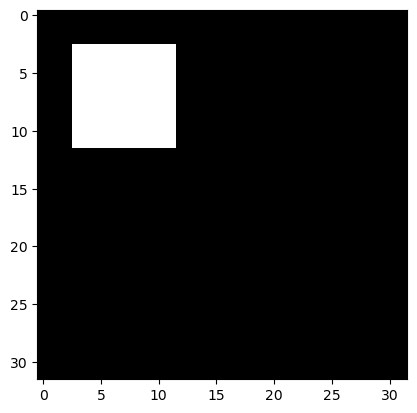

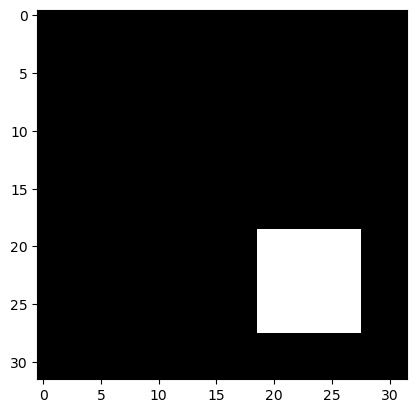

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 32
Nx = 32
Ny = 32

mu = np.zeros(Nx*Ny)
nu = np.zeros(Nx*Ny)

for i in range(int(0.1*Ny), int(0.4*Ny)):
  for j in range(int(0.1*Nx), int(0.4*Nx)):
    mu[i*Nx+j] = 1

for i in range(int(0.6*Ny), int(0.9*Ny)):
  for j in range(int(0.6*Nx), int(0.9*Nx)):
    nu[i*Nx+j] = 1

plt.imshow(mu.reshape([Ny,Nx]), cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(nu.reshape([Ny,Nx]), cmap='gray', vmin=0, vmax=1)
plt.show()

### Résolution

In [19]:
from scipy import sparse
from scipy.sparse.linalg.dsolve import linsolve

r = 1
qPrev = np.zeros([3, Nt*Nx*Ny]) # = [a, b] \to\R^3
gamma = np.zeros([3, Nt*Nx*Ny]) # = [rho, m] m\to \R^2

while True:
  # step 1
  phi = step1(gamma, qPrev, mu, nu)
  # step 2
  spaceTimeGradPhi = spaceTimeGrad(phi)
  q = step2(spaceTimeGradPhi + 1./r*gamma)
  # step 3
  gammaNext = gamma + r*( spaceTimeGradPhi - q )

  qPrev = q
  gamma = gammaNext

  # Stop criterion
  res = spaceTimeGradPhi[0,:] + 0.5*(np.power(spaceTimeGradPhi[1,:], 2) + np.power(spaceTimeGradPhi[2,:], 2) )
  crit = np.sqrt( np.sum( np.multiply(gamma[0,:], np.abs(res))) / np.sum( np.multiply(gamma[0,:], np.power(spaceTimeGradPhi[1,:], 2) + np.power(spaceTimeGradPhi[2,:], 2) )) )
  print(crit)

  if crit <= 0.1:
    break

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_213/3204273823.py:2: DeprecationWarning: `scipy.sparse.linalg.dsolve.linsolve` is deprecated along with the `scipy.sparse.linalg.dsolve` namespace. `scipy.sparse.linalg.dsolve.linsolve` will be removed in SciPy 1.14.0, and the `scipy.sparse.linalg.dsolve` namespace will be removed in SciPy 2.0.0.
  from scipy.sparse.linalg.dsolve import linsolve


2.556399031746419
1.4338560873657726
0.9346058232614327
0.6535409097929099
0.4954751495759261
0.42131330391762284
0.37917049327633867
0.3505150952317737
0.3282736066476075
0.3101435323703557
0.2942424696514542
0.28033558184173807
0.2681190545372913
0.25708583617997594
0.2473137877650769
0.23836163172108496
0.2298311488381538
0.221294928142773
0.2129858560674149
0.2048903339101501
0.19733730305871003
0.19030345310431382
0.18362624262347615
0.1772327678887365
0.17106319540357962
0.1649157777637246
0.1592672683020546
0.15425021162842179
0.14967967489952727
0.1455462813390064
0.14178506985436565
0.13835997483441878
0.1353286269290283
0.1324379431859375
0.1297322115276096
0.12713046505826808
0.12456273931537681
0.12214299913646602
0.1198185547376561
0.11768555785611393
0.11571706837023212
0.11397592531410389
0.11220867747743017
0.11043305523072701
0.10870051249701167
0.10704991278010695
0.1054803067425133
0.10398896758609315
0.10259651935335659
0.10133111184100511
0.10006787159646878
0.0988

### Affichage

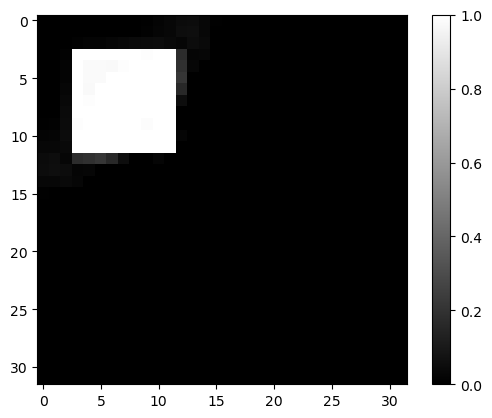

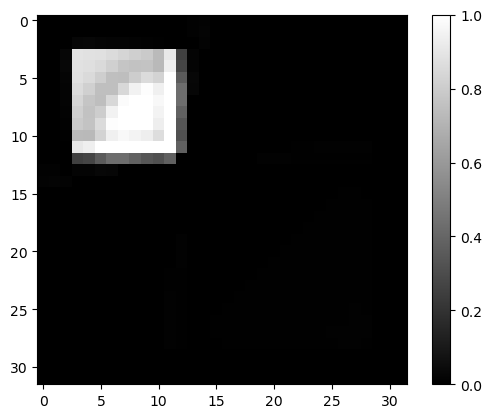

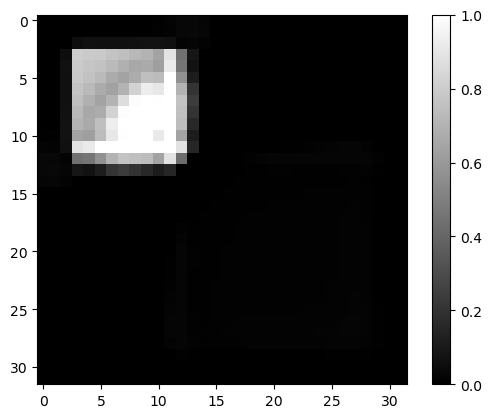

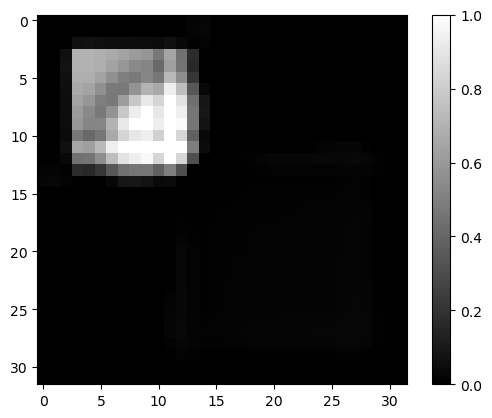

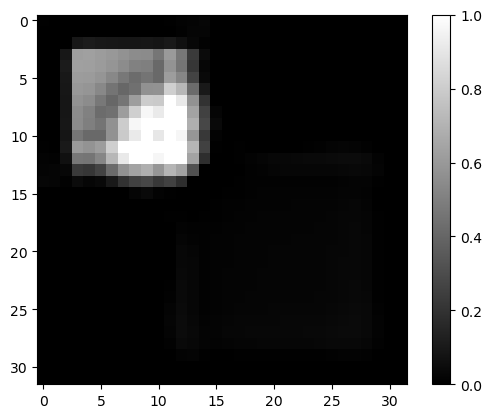

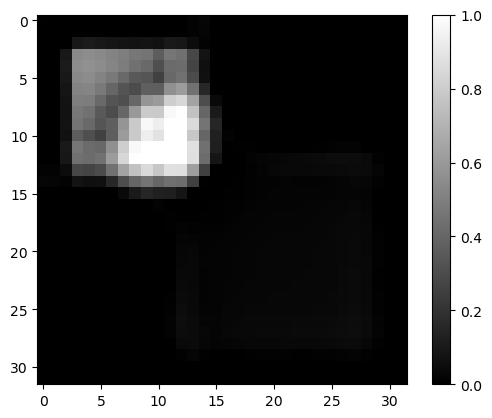

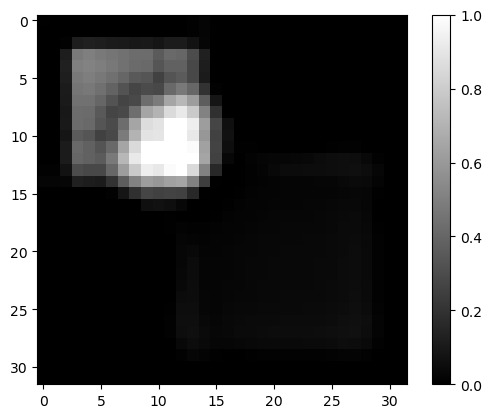

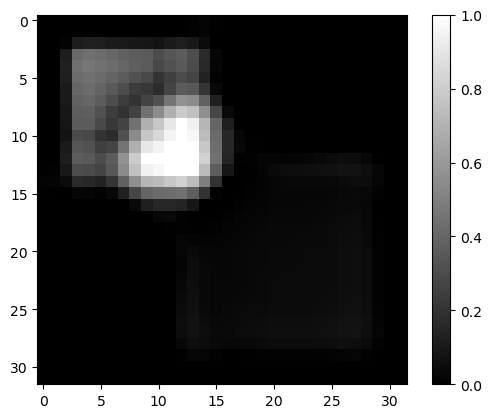

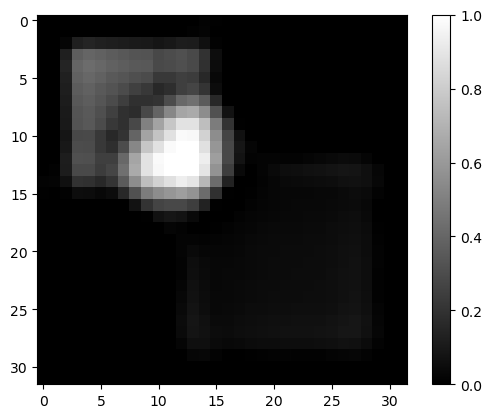

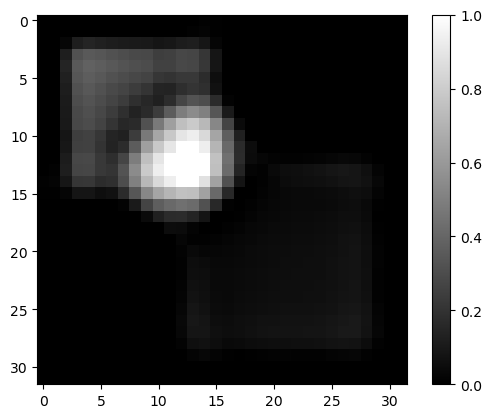

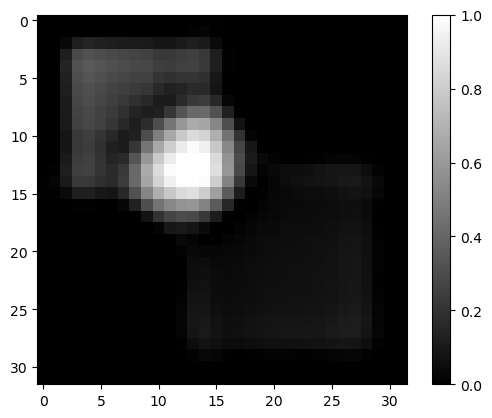

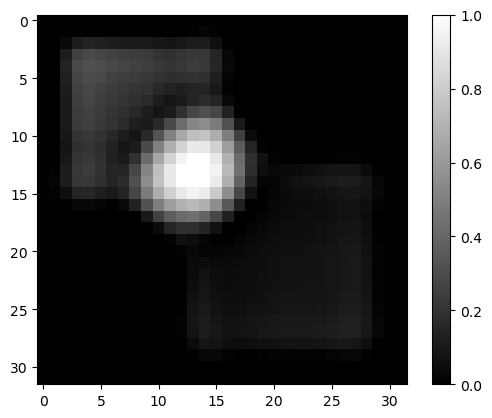

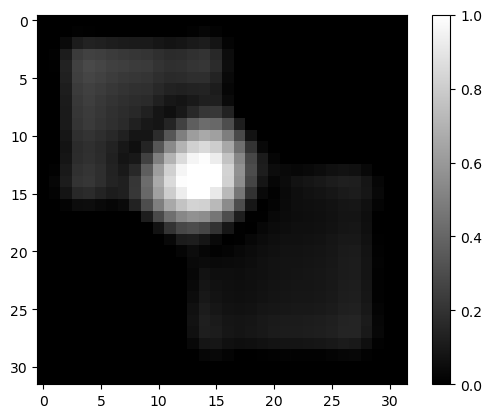

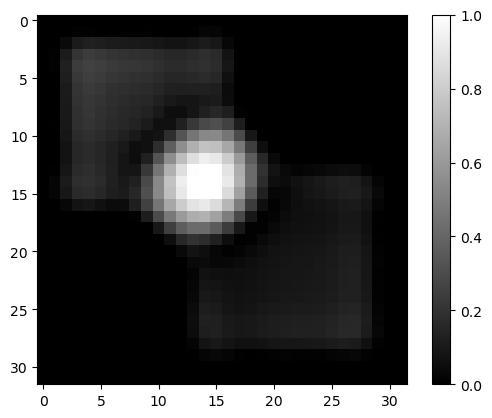

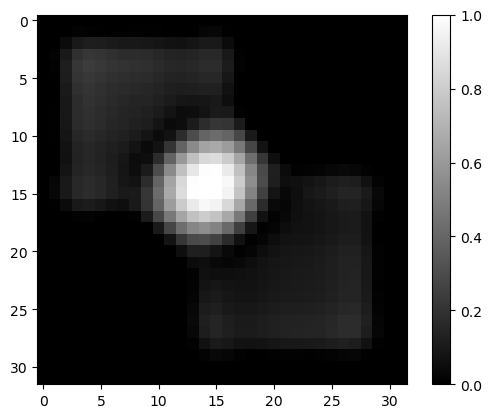

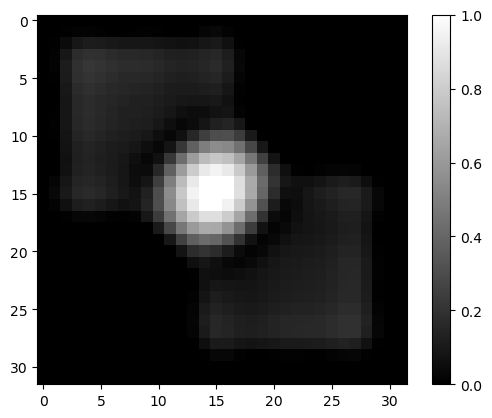

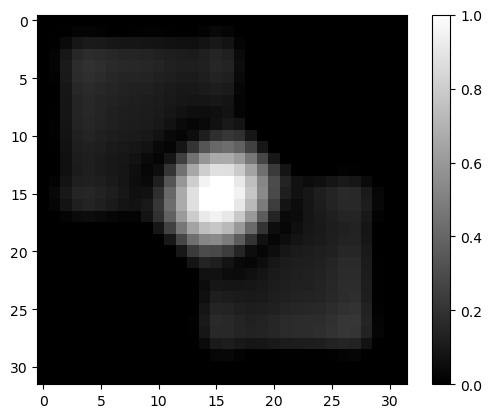

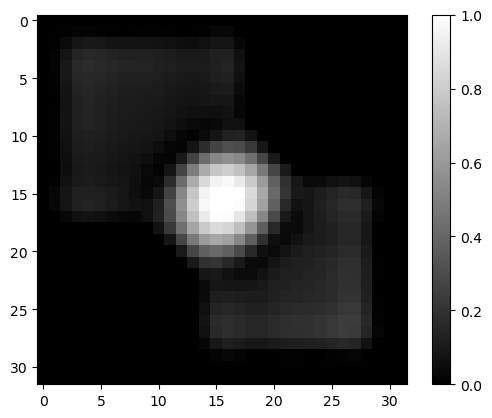

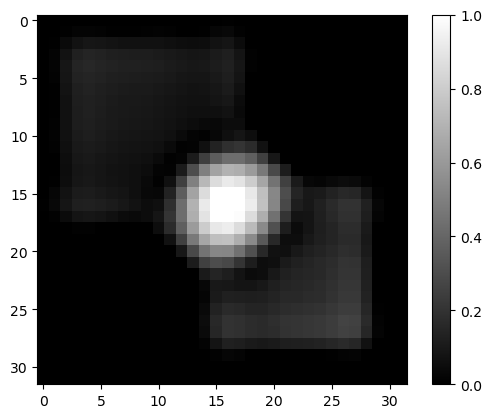

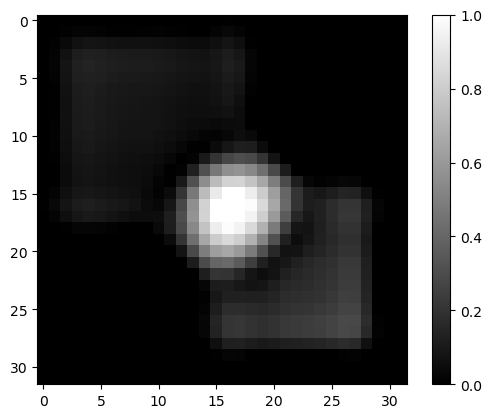

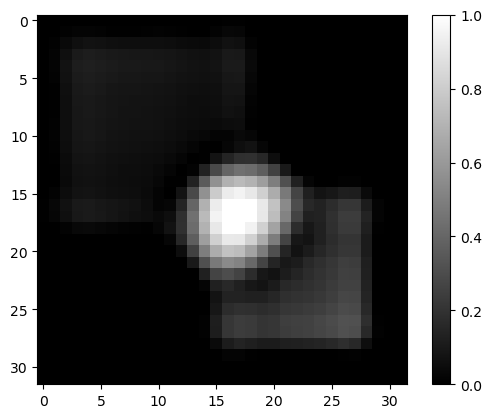

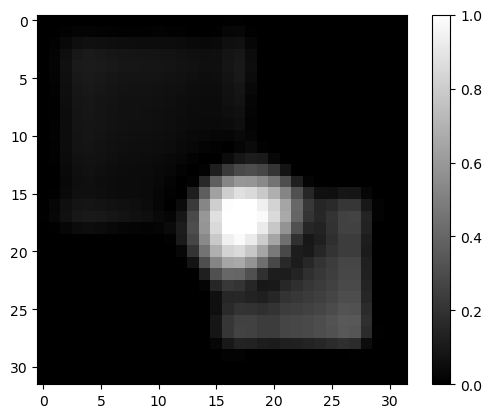

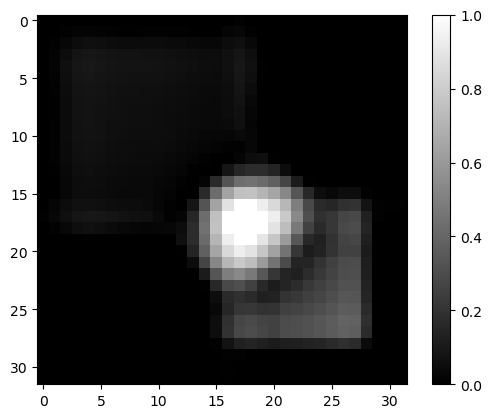

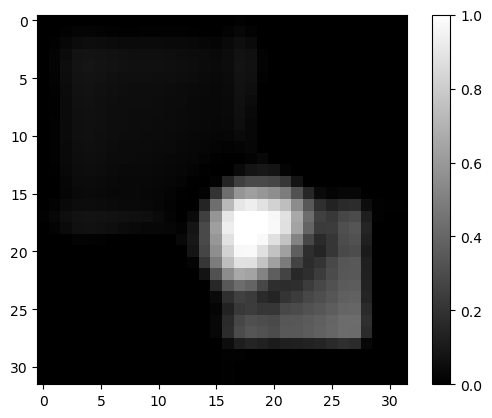

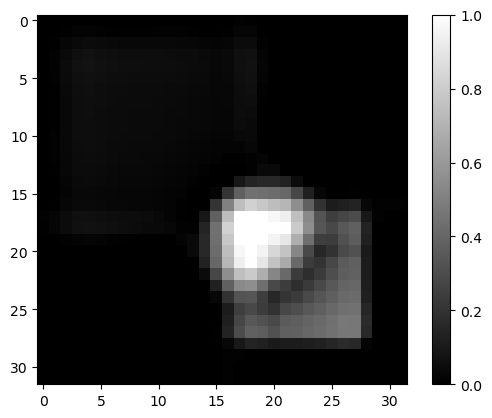

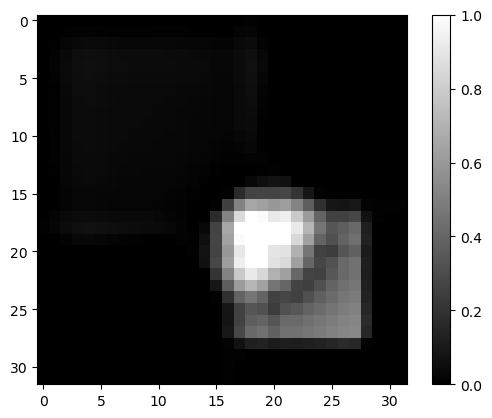

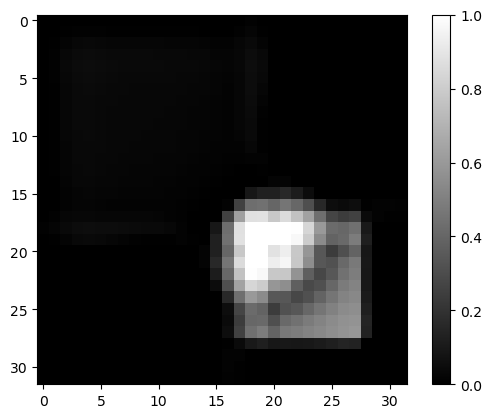

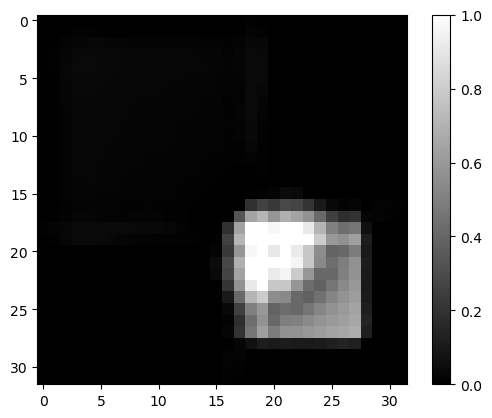

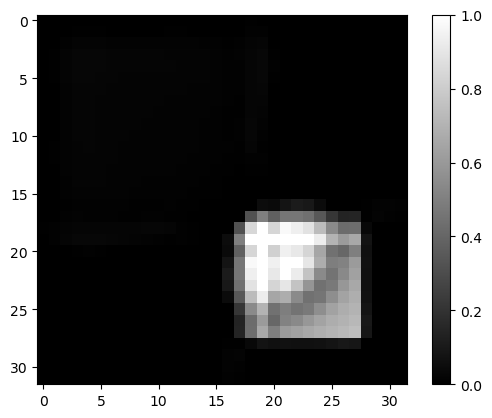

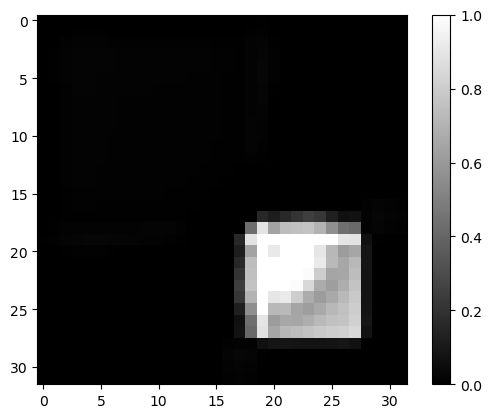

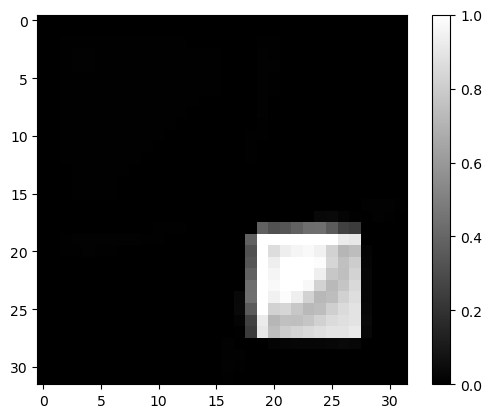

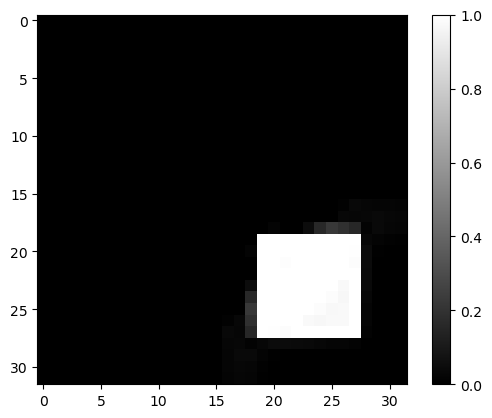

In [20]:
for n in range(Nt):
  xn = np.zeros(Nx*Ny)
  for i in range(Nx*Ny):
    xn[i] = gamma[0, n*Nx*Ny + i]

  fig = plt.figure()
  ax = fig.add_subplot(111)
  im = ax.imshow(xn.reshape([Ny,Nx]), cmap='gray', vmin=0, vmax=1)
  fig.colorbar(im)
  plt.show()